<a href="https://colab.research.google.com/github/gururajkulkarni40/FireDetection/blob/main/FireDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
tf.__version__

'2.4.1'

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

Data Augumentation
[link text](https://)

In [ ]:
# very important preprocessing is resizing and rescaling bcoz very high definition pic (every image reduce / 255)

In [ ]:
training_datagenerator=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,validation_split=0.1)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
batch_size=16
train = training_datagenerator.flow_from_directory('/content/drive/MyDrive/FireDetect/Training Data',target_size=(256,256),color_mode='rgb',class_mode='binary',batch_size=16,subset='training')

validation = training_datagenerator.flow_from_directory('/content/drive/MyDrive/FireDetect/Training Data',target_size=(256,256),color_mode='rgb',class_mode='binary',batch_size=16,subset='validation')

Found 264 images belonging to 3 classes.
Found 28 images belonging to 3 classes.


dividing the data into training and validation

# Initializing CNN

In [ ]:
cnn=tf.keras.models.Sequential()

# adding first layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
cnn.summary()


Time to Train our CNN Model
Compile and Train¶


In [ ]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/FireDetect/Training Data/models/Fire_and_Smoke.h5',
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=checkpoint

In [ ]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
cnn.fit_generator(train,validation_data=validation,epochs=1,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )

Lets Test It

In [ ]:
from tensorflow.keras.models import load_model
cnn=load_model('/content/drive/MyDrive/FireDetect/Training Data/models/Fire_and_Smoke.h5')

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               12845184  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [ ]:
image_for_testing='/content/drive/MyDrive/FireDetect/Training Data/Fire/5.png'

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


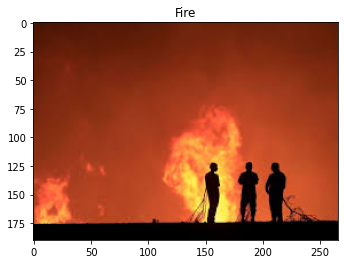

In [ ]:
image_for_testing='/content/drive/MyDrive/FireDetect/Training Data/Fire/fire-63.1076606855.png'
test_image=image.load_img(image_for_testing,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict_classes(test_image)

Catagories=['Fire','Smoke']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()